Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.OJ3KFQ_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.OJ3KFQ_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Number of Classes: 62


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 566s 103ms/step - accuracy: 0.6986 - loss: 1.0520 - val_accuracy: 0.8471 - val_loss: 0.4253
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 460s 84ms/step - accuracy: 0.8212 - loss: 0.5340 - val_accuracy: 0.8541 - val_loss: 0.3976
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 494s 83ms/step - accuracy: 0.8345 - loss: 0.4840 - val_accuracy: 0.8583 - val_loss: 0.3871
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 454s 83ms/step - accuracy: 0.8418 - loss: 0.4598 - val_accuracy: 0.8600 - val_loss: 0.3776
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 452s 83ms/step - accuracy: 0.8454 - loss: 0.4449 - val_accuracy: 0.8623 - val_loss: 0.3736
909/909 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8629 - loss: 0.3711
Test Accuracy: 86.23%


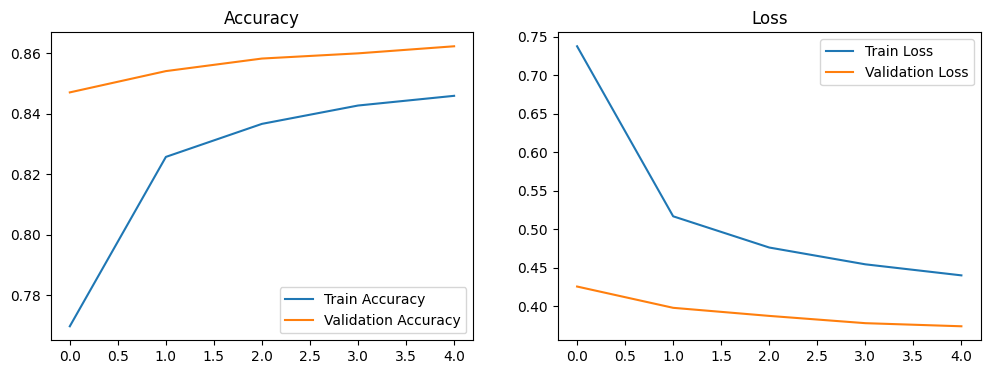

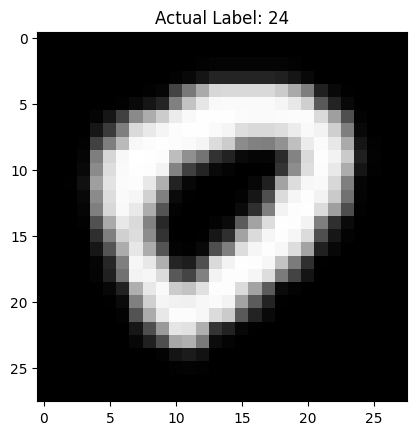

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Label: 24


In [1]:
# Handwritten Character Recognition using EMNIST Dataset
# Google Colab Ready

# STEP 1: Install and Import Libraries
!pip install tensorflow tensorflow-datasets matplotlib seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# STEP 2: Load EMNIST Dataset (ByClass contains digits + letters)
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

num_classes = ds_info.features['label'].num_classes
print("Number of Classes:", num_classes)

# STEP 3: Preprocess the data
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.rot90(image)  # Rotate because EMNIST is rotated
    image = tf.image.flip_left_right(image)
    return image, label

train_data = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.cache().shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)

test_data = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(128).cache().prefetch(tf.data.AUTOTUNE)

# STEP 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# STEP 5: Train Model
history = model.fit(train_data, epochs=5, validation_data=test_data)

# STEP 6: Evaluate Model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# STEP 7: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# STEP 8: Make a Prediction Example
for images, labels in test_data.take(1):
    sample_image = images[0]
    sample_label = labels[0]
    plt.imshow(sample_image.numpy().reshape(28, 28), cmap='gray')
    plt.title(f"Actual Label: {sample_label.numpy()}")
    plt.show()

    pred = model.predict(sample_image.numpy().reshape(1, 28, 28, 1))
    pred_label = np.argmax(pred)
    print(f"Predicted Label: {pred_label}")
